# Evaluation of Student Dataset using Machine Learning Algorithms <br>
## Muzammil Mushtaq

# Objective: Probabilties of the students successfully completed their guaduation.

# Content: 

> Given the limited student data from a reputed university that include relevant information of the students currently enrolled in the university for a specific program like personal information and curriculum data.  

> As a Data Scientist perform detail EDA on the data and prepare a prediction model which predicts whether a college student will graduate or not using at least five machine learning algorithms.  

> Try to bring relevant inference from the model by visualizing the performance through confusion metrics and AUC-ROC curve.

# Task 1:

> Perform a detailed EDA on the given student dataset and highlight the important features.

> Split the Training (80%) and Testing (20%) dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Read the CSV file
data = pd.read_csv('Student_academic.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
import seaborn as sns

In [3]:
# Count the values in the 'Column1' column
value_counts = data['Target'].value_counts()

# Print the value counts
print(value_counts)

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


In [4]:
print('The length of whole dataset : ',len(data))
# Drop rows with a specific value in 'Column1'
target_value_to_drop = 'Enrolled'
data = data.drop(data[data['Target'] == target_value_to_drop].index)

# Print the updated DataFrame
print('The length of dataset after excluding the Enrolled students : ',len(data))

The length of whole dataset :  4424
The length of dataset after excluding the Enrolled students :  3630


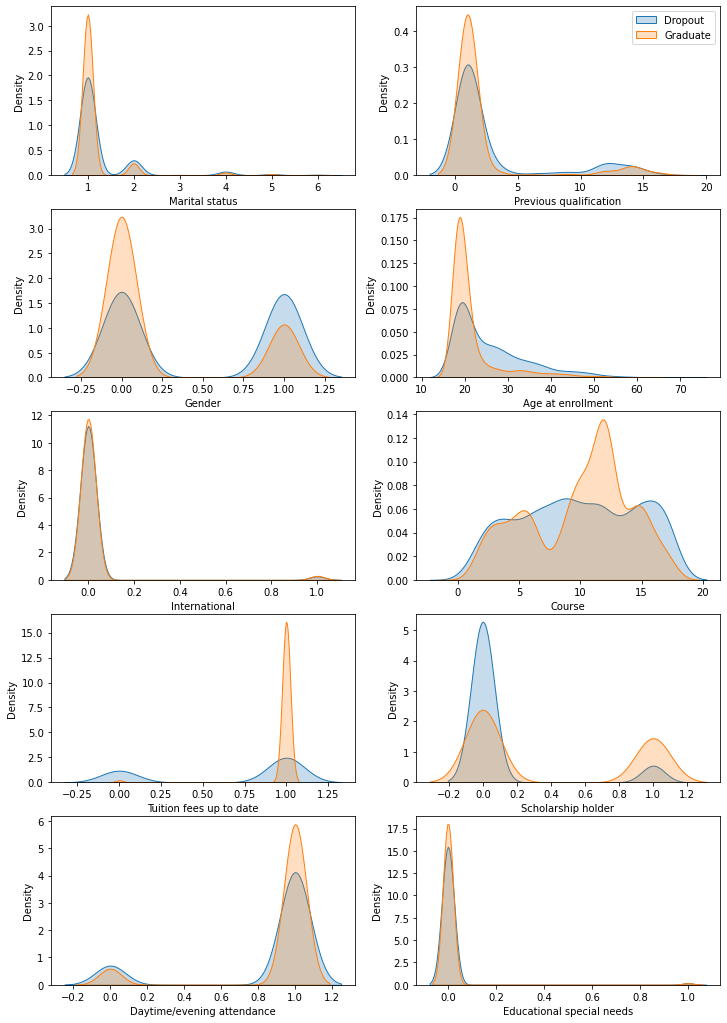

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


value_vars =['Marital status', 'Previous qualification', 'Gender', 'Age at enrollment',
             'International', 'Course','Tuition fees up to date','Scholarship holder',
            'Daytime/evening attendance','Educational special needs']
f, axs = plt.subplots(2, 2, figsize=(12, 18))

for i in range(0,len(value_vars)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(data.loc[data['Target']  == 'Dropout', value_vars[i]], shade=True, label='Dropout')
    sns.kdeplot(data.loc[data['Target'] == 'Graduate', value_vars[i]], shade=True, label='Graduate')
    
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

### Distribution Results:

> I have plotted the density distribution of 10 features splitted among the 'Graduated' and 'Dropout'.

> In the first visualization, if we ignored the frequency we can noticed that the distribution of many features among different targets are the same. Except the 'Age of enrollment', 'Tuition fees up to date', and 'Course' where the dropout students have more skewed distribution than graduated students.

> I presumed since the distributions of 'Age of enrollment', 'Tuition fees up to date' and 'Course' are different for two targets. Therefore, it might affect more on the prediction than other features.

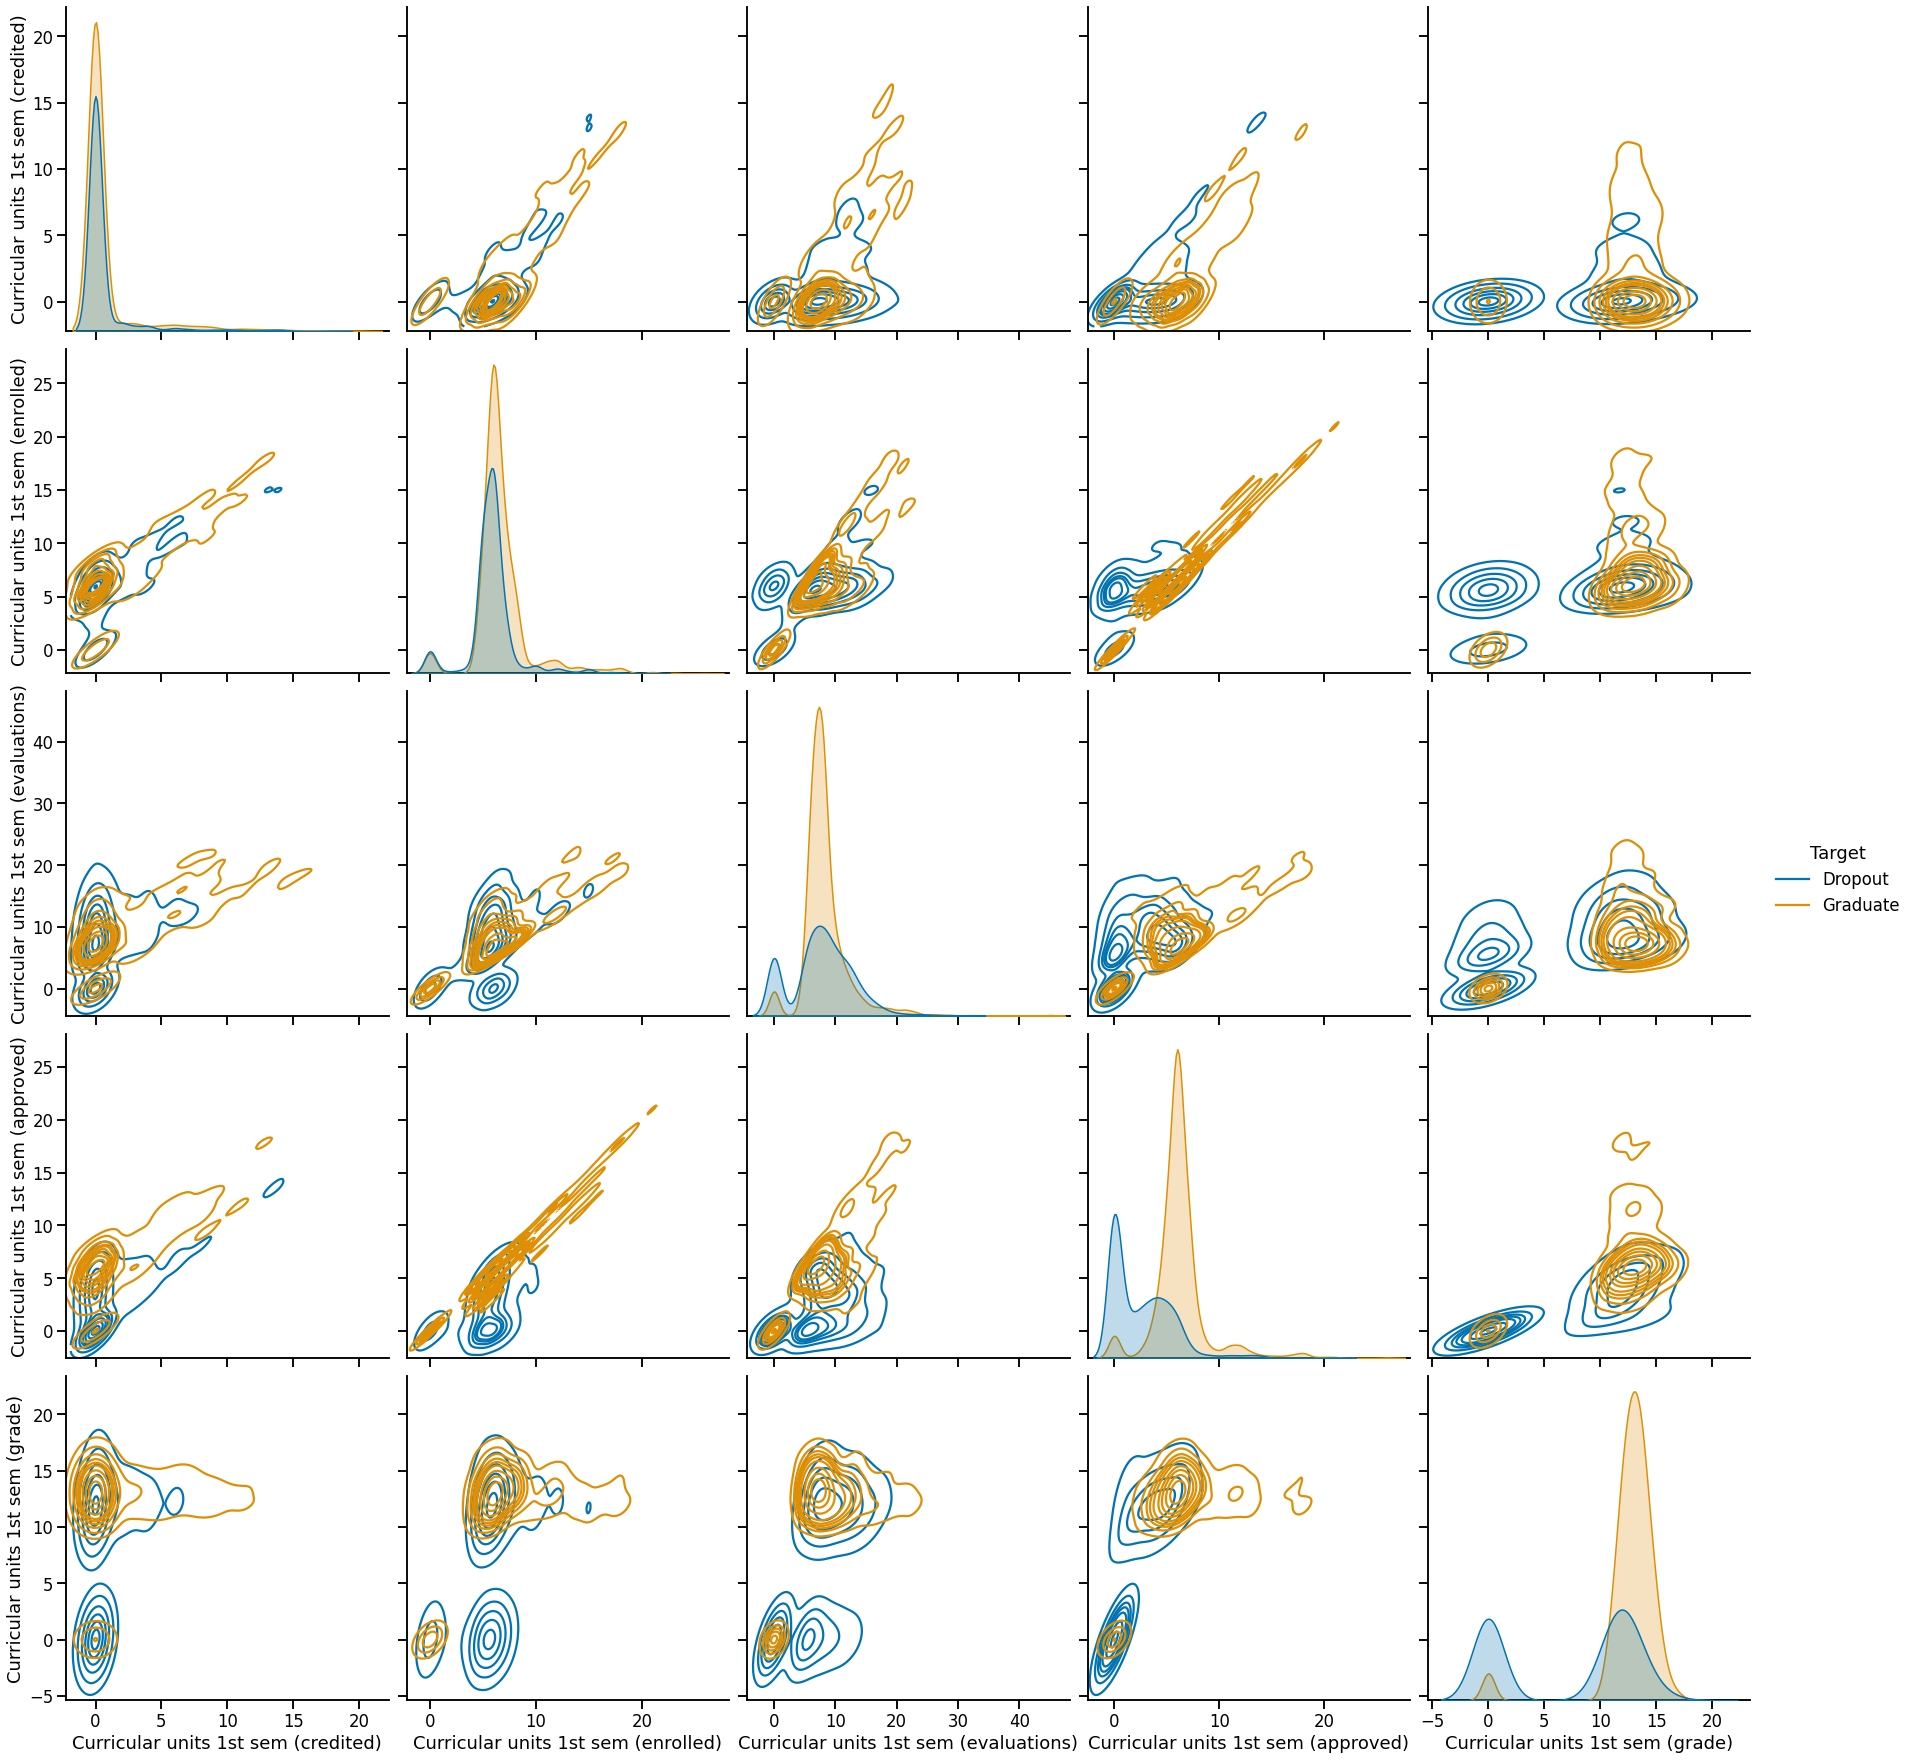

In [12]:
df1 = data[['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)','Target']]
#sns.pairplot(df1, hue="Target", palette="colorblind", kind="kde")
sns.set_context("paper", rc={"axes.labelsize":10})
sns.set_context("talk", font_scale=1.0)
xpl=sns.pairplot(df1, hue="Target", palette="colorblind", kind="kde",height=5, aspect=1)

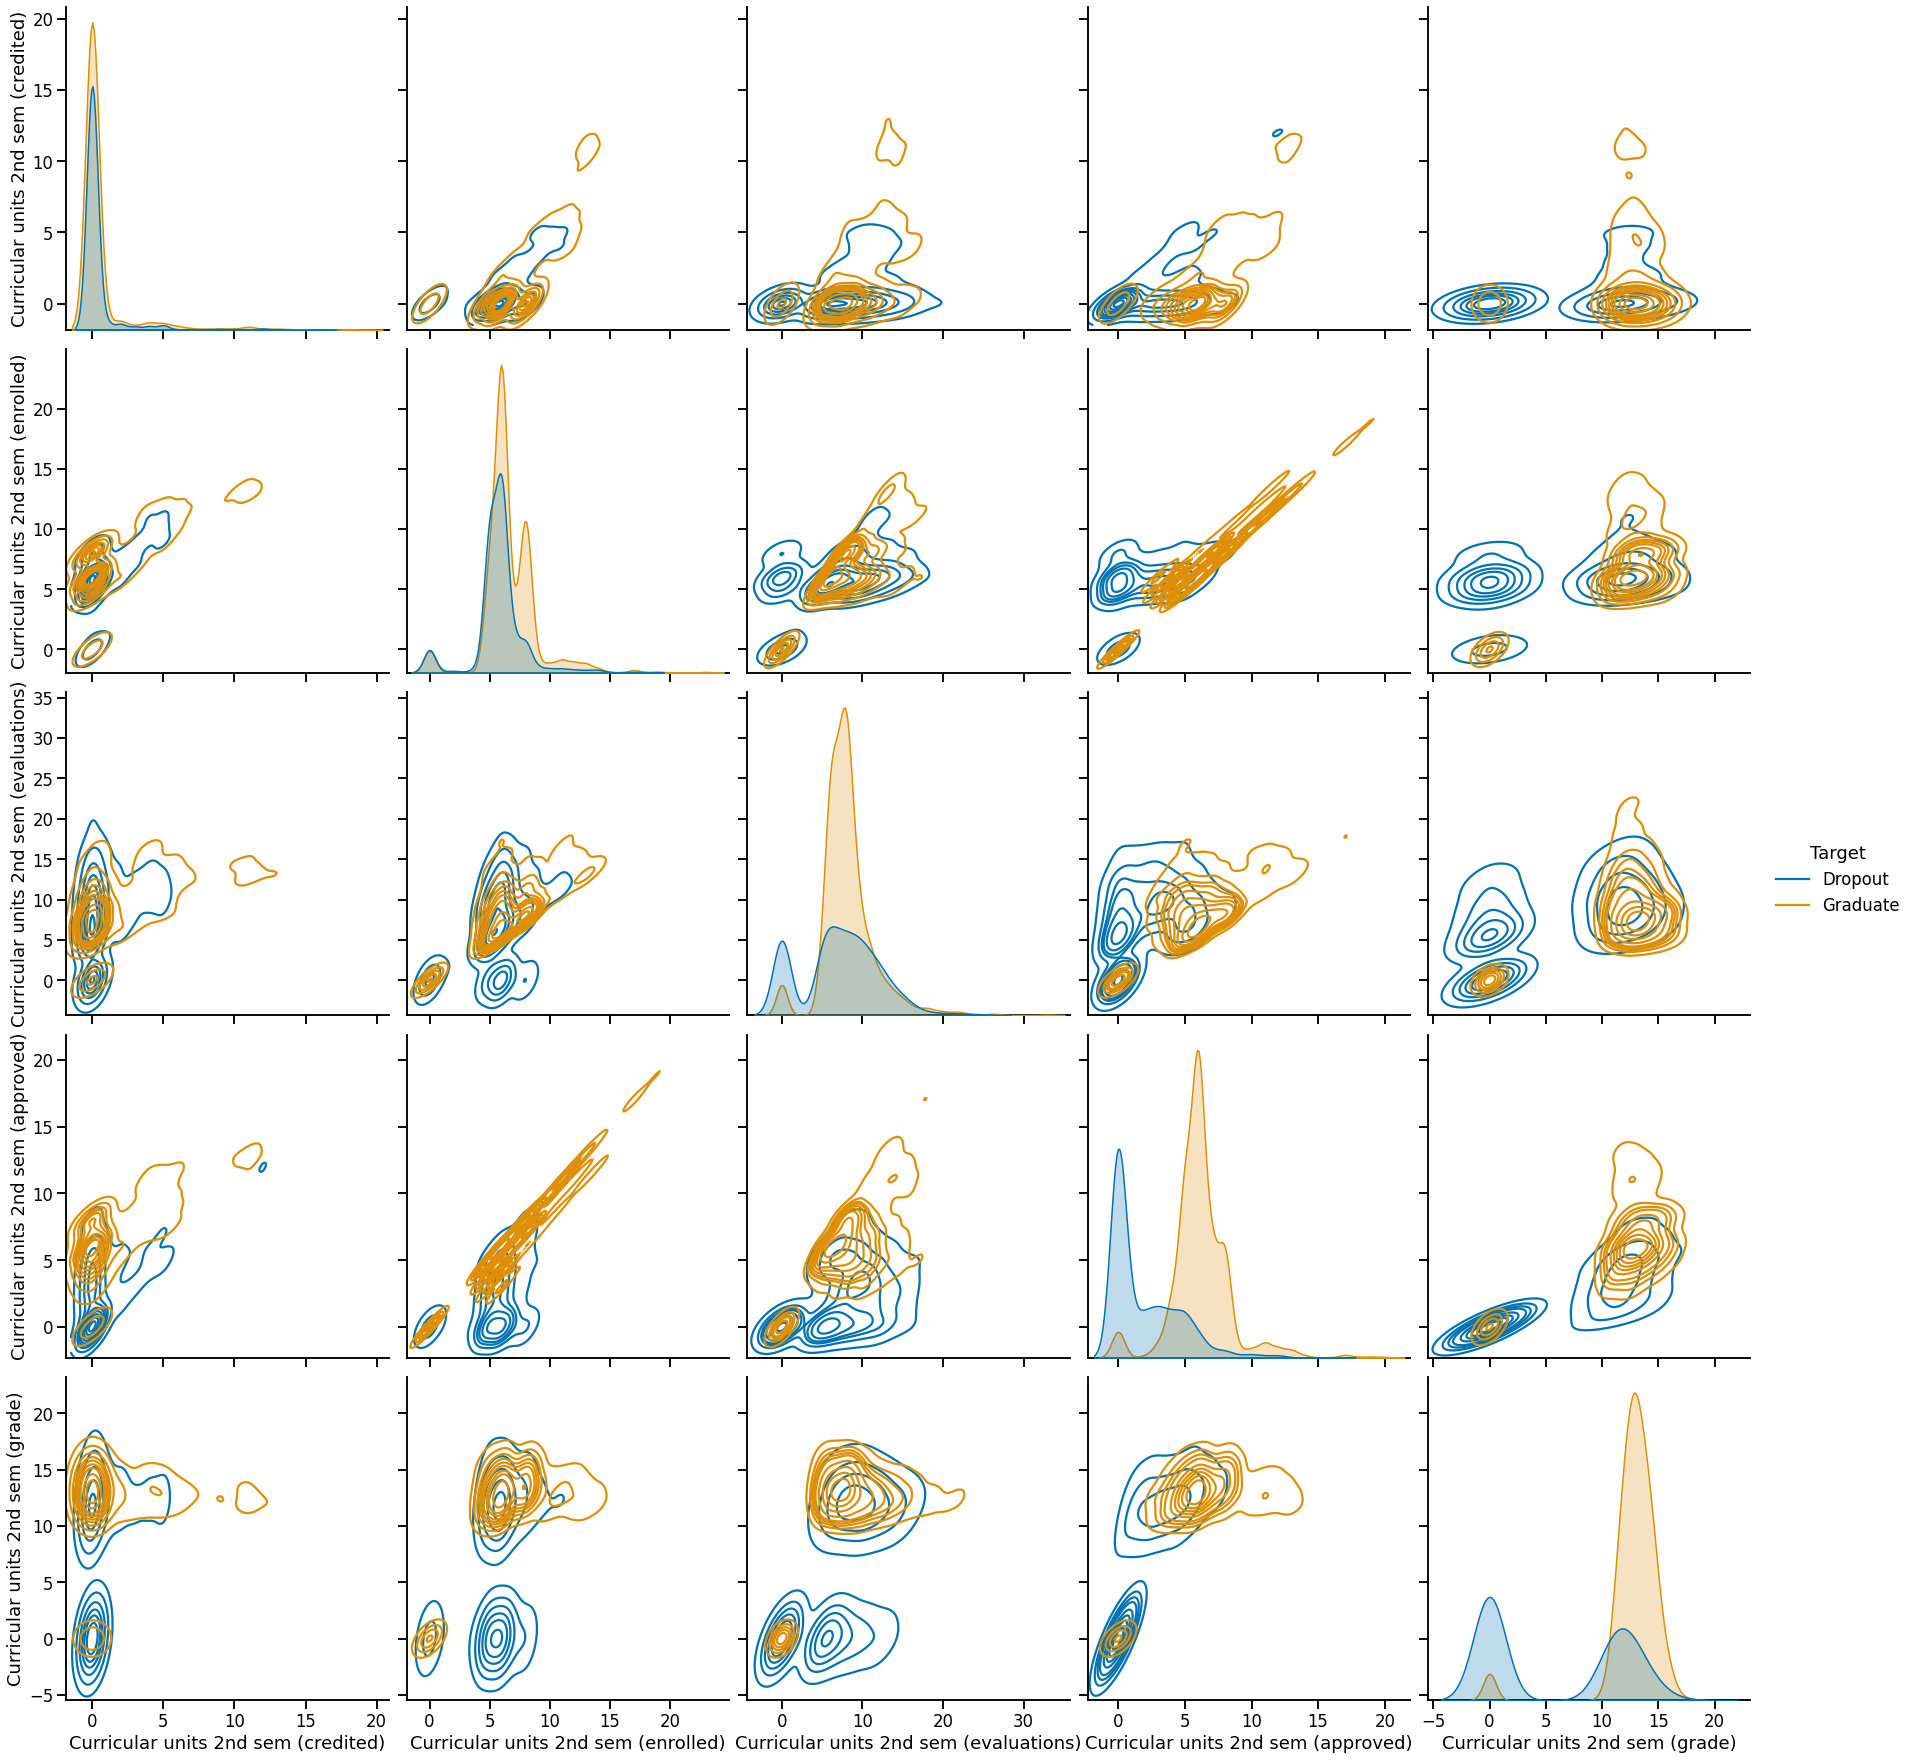

In [13]:
df2 = data[['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Target']]
#sns.pairplot(df1, hue="Target", palette="colorblind", kind="kde")
sns.set_context("paper", rc={"axes.labelsize":10})
sns.set_context("talk", font_scale=1.0)
xpl=sns.pairplot(df2, hue="Target", palette="colorblind", kind="kde",height=5, aspect=1)

### Pair Plot Results:

> I have plotted two pairplots, one is for first semester and other is for second semester.

> In non-diagonal plots, I have used contours instead of the scatter plots. Concentrated contours show the higher density of data points.

> I would apply the same reasoning as of previous plot that is the distribution of features (Xs) that seperate out two targets (Graduate & dropout) are essential for prediction.

> When it comes to the Curricular Units for both semesters, the 'approved' and 'grade' features have unique distributions. Both of the given features have higher values (X-axis values) for graduated students than the dropout students.   

## Important Features Extraction:



In [5]:
important_features_list = ['Course','Tuition fees up to date','Age at enrollment', 'Curricular units 1st sem (approved)', 
                           'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 
                           'Curricular units 2nd sem (grade)',
                          'Target']

data_new = data[important_features_list]
data_new.head()

,Course,Tuition fees up to date,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,2,1,20,0,0.000000,0,0.000000,Dropout
1,11,0,19,6,14.000000,6,13.666667,Graduate
2,5,0,19,0,0.000000,0,0.000000,Dropout
3,15,1,20,6,13.428571,5,12.400000,Graduate
4,3,1,45,5,12.333333,6,13.000000,Graduate


### Change the string targets to integers

In [6]:
data_new['sentiment'] = data_new['Target'].apply(lambda rating : +1 if rating == 'Graduate' else -1)
data_new['sentiment']

0      -1
1       1
2      -1
3       1
4       1
       ..
4419    1
4420   -1
4421   -1
4422    1
4423    1
Name: sentiment, Length: 3630, dtype: int64

### Randomly split the dataset into Training (80%) & Testing (20%)

In [7]:
import numpy as np
length = len(data_new)

data_new['random_number'] = np.random.randint(length, size=length)
#print (random_sample_new['random_number'])
train = data_new[data_new['random_number'] <= int(length*0.8)]
test = data_new[data_new['random_number'] > int(length*0.8)] 
print ('Length of Training dataset is :', len(train),'\n',
      'Length of Testing dataset is :', len(test))
train.head()

Length of Training dataset is : 2948 
 Length of Testing dataset is : 682


,Course,Tuition fees up to date,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target,sentiment,random_number
0,2,1,20,0,0.000000,0,0.000000,Dropout,-1,2457
1,11,0,19,6,14.000000,6,13.666667,Graduate,1,1661
2,5,0,19,0,0.000000,0,0.000000,Dropout,-1,2683
4,3,1,45,5,12.333333,6,13.000000,Graduate,1,45
5,17,1,50,5,11.857143,5,11.500000,Graduate,1,1556


In [8]:
columns_to_exclude = ['Target', 'sentiment','random_number']

# Drop the specified columns from the dataframe
X_train = train.drop(columns_to_exclude, axis=1)
X_test = test.drop(columns_to_exclude, axis=1)
y_train = train['sentiment']
y_test = test['sentiment']

# Task 2:

> Apply Five different Supervised Machine Learning techniques to predict whether the students would graduate or dropout.

> Find the accuracy and ROC-Curve of the models

> Apply SHAP to visualized the important features for the model

In [9]:
def diff_threshold(given_threshold, threshold):
    # calculate the difference array
    difference_array = np.absolute((threshold*100)-given_threshold)
    # find the index of minimum element from the array
    index = difference_array.argmin()
    return index

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from pretty_confusion_matrix import pp_matrix
from pretty_confusion_matrix import pp_matrix_from_data

import shap
shap.initjs()
def Supervised_ML(model):
    print (50*'*')
    '''                             MODEL FITTING ON TRAIN & TEST DATASET               
    '''
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    new = np.asarray(y_test)
    
    '''                              SHAP ANALYSIS (Put in comments if you dont want to used also comment return...)
    
    '''
    #Get shap values
    explainer = shap.Explainer(model.predict,X_train)
    shap_values = explainer(X_test)
    
    '''                             CONFUSION MATRIX AND CLASSIFICATION REPORT                                   
    '''
    
    Confusion_Matrix = confusion_matrix(predictions, y_test)
    print ('Confusion Matrix of '+ str(model)+ ' is :', '\n','[True Pos, False Pos]','\n', '[False Neg, True Neg]','\n',
           Confusion_Matrix,'\n','\n',
           'Classification Report of '+ str(model)+ ' is :', '\n',
           classification_report(predictions,y_test))
    cmd = ConfusionMatrixDisplay(Confusion_Matrix, display_labels=['Graduate','Dropout'])
    cmd.plot()
    
    '''                             PREDICT PROBABILITIES ON TEST DATASET
    '''
    
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    
    '''                              CALCULATE ROC-AUC SCORE
    '''
    # calculate scores
    auc = roc_auc_score(y_test, probs)
    # summarize scores
    print(str(model)+': ROC AUC=%.3f' % (auc))
    
    '''                               CALCULATE ROC CURVE & HIGHLGIHT DIFFERENT THRESHOLD POINTS
    '''
    # calculate roc
    fpr, tpr, threshold = roc_curve(y_test, probs)
    # calculate g-measn for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    #locate index of largest g-means
    ix = np.argmax(gmeans)
    print ('Best Threshold = %.2f [percent]' % (threshold[ix]*100))
    #*****************************************************************
    
    threshold_50 = diff_threshold(50, threshold)
    threshold_75 = diff_threshold(75, threshold)
    threshold_90 = diff_threshold(90, threshold)

    '''                                  PLOT THE ROC-CURVE OF GIVEN MODEL
    '''
    f, axs = plt.subplots(1,1,figsize=(8, 8))
    # plot the roc curve for the model
    plt.plot(fpr, tpr, 'b-',linewidth=5, label=str(model))
    plt.scatter(fpr[ix], tpr[ix], marker='^',color='black',linewidth=8,label=str('Best'),zorder=2)
    plt.scatter(fpr[threshold_50], tpr[threshold_50], marker='^',color='green',linewidth=9,label=str('50% threshold'),zorder=2)
    plt.scatter(fpr[threshold_75], tpr[threshold_75], marker='^',color='red',linewidth=9,label=str('75% threshold'),zorder=2)
    plt.scatter(fpr[threshold_90], tpr[threshold_90], marker='^',color='yellow',linewidth=9,label=str('90% threshold'),zorder=2)

    # griding and legends
    plt.legend(fontsize = 12)
    axs.grid(which = "both")
    axs.minorticks_on()
    axs.tick_params(which = "minor", bottom = False, left = False)

    # set labels and font size
    axs.set_xlabel('False Positive Rate (1 minus the specificity)', fontsize = 12)
    axs.set_ylabel('True Positive Rate (Sensitivity)', fontsize = 12)

    # change font size for x axis
    axs.xaxis.get_label().set_fontsize(20)
    axs.yaxis.get_label().set_fontsize(20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    # show the plot
    plt.show()
  #  print (shap_values)
    return (shap_values)


**************************************************
Confusion Matrix of LogisticRegression() is : 
 [True Pos, False Pos] 
 [False Neg, True Neg] 
 [[219  44]
 [ 61 432]] 
 
 Classification Report of LogisticRegression() is : 
               precision    recall  f1-score   support

          -1       0.78      0.83      0.81       263
           1       0.91      0.88      0.89       493

    accuracy                           0.86       756
   macro avg       0.84      0.85      0.85       756
weighted avg       0.86      0.86      0.86       756

LogisticRegression(): ROC AUC=0.910
Best Threshold = 70.92 [percent]


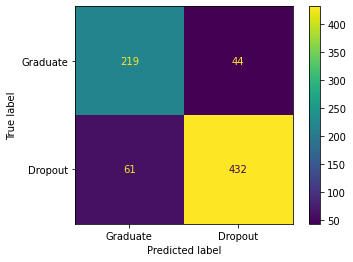

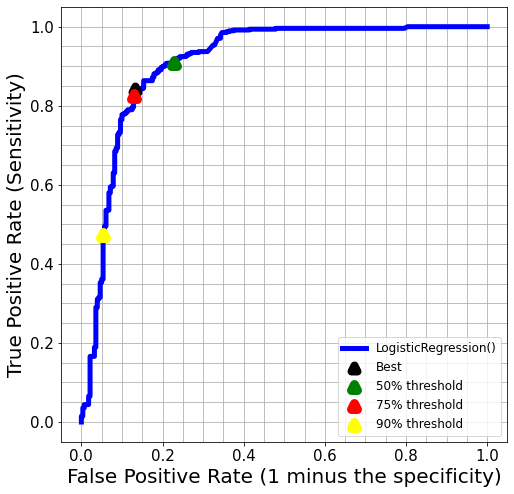

In [11]:
SHAP_values = Supervised_ML(LogisticRegression())

**************************************************


Exact explainer: 683it [00:31, 20.38it/s]                                      


Confusion Matrix of RandomForestClassifier(criterion='entropy', n_estimators=10) is : 
 [True Pos, False Pos] 
 [False Neg, True Neg] 
 [[240  23]
 [ 53 366]] 
 
 Classification Report of RandomForestClassifier(criterion='entropy', n_estimators=10) is : 
               precision    recall  f1-score   support

          -1       0.82      0.91      0.86       263
           1       0.94      0.87      0.91       419

    accuracy                           0.89       682
   macro avg       0.88      0.89      0.88       682
weighted avg       0.89      0.89      0.89       682

RandomForestClassifier(criterion='entropy', n_estimators=10): ROC AUC=0.941
Best Threshold = 70.00 [percent]


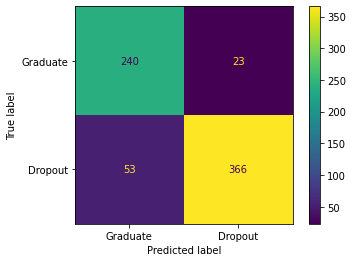

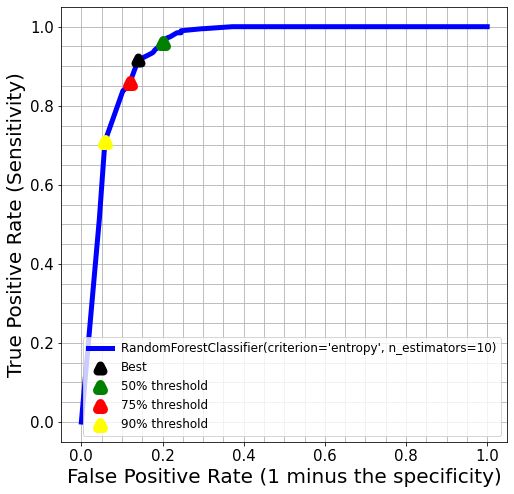

In [11]:
SHAP_values = Supervised_ML(RandomForestClassifier(n_estimators=10, criterion="entropy"))

**************************************************
Confusion Matrix of DecisionTreeClassifier(criterion='entropy', random_state=0) is : 
 [True Pos, False Pos] 
 [False Neg, True Neg] 
 [[225  75]
 [ 55 401]] 
 
 Classification Report of DecisionTreeClassifier(criterion='entropy', random_state=0) is : 
               precision    recall  f1-score   support

          -1       0.80      0.75      0.78       300
           1       0.84      0.88      0.86       456

    accuracy                           0.83       756
   macro avg       0.82      0.81      0.82       756
weighted avg       0.83      0.83      0.83       756

DecisionTreeClassifier(criterion='entropy', random_state=0): ROC AUC=0.838
Best Threshold = 25.00 [percent]


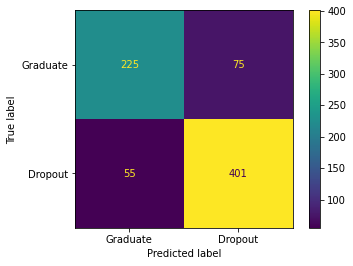

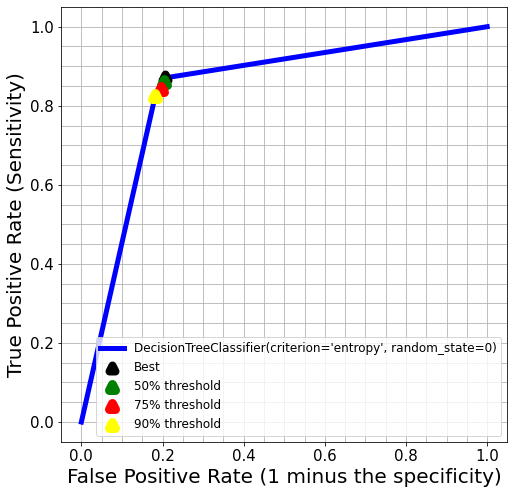

In [13]:
Supervised_ML(DecisionTreeClassifier(criterion="entropy", random_state=0))

**************************************************
Confusion Matrix of GaussianNB() is : 
 [True Pos, False Pos] 
 [False Neg, True Neg] 
 [[202  34]
 [ 78 442]] 
 
 Classification Report of GaussianNB() is : 
               precision    recall  f1-score   support

          -1       0.72      0.86      0.78       236
           1       0.93      0.85      0.89       520

    accuracy                           0.85       756
   macro avg       0.82      0.85      0.84       756
weighted avg       0.86      0.85      0.85       756

GaussianNB(): ROC AUC=0.896
Best Threshold = 98.63 [percent]


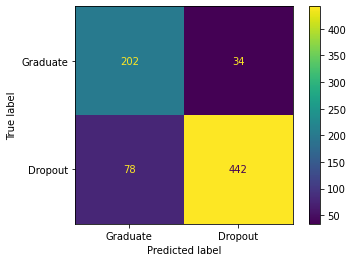

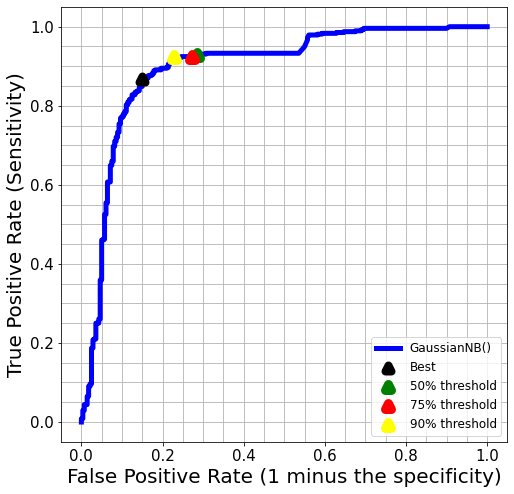

In [14]:
Supervised_ML(GaussianNB())

**************************************************
Confusion Matrix of SVC(kernel='linear', probability=True, random_state=0) is : 
 [True Pos, False Pos] 
 [False Neg, True Neg] 
 [[215  35]
 [ 65 441]] 
 
 Classification Report of SVC(kernel='linear', probability=True, random_state=0) is : 
               precision    recall  f1-score   support

          -1       0.77      0.86      0.81       250
           1       0.93      0.87      0.90       506

    accuracy                           0.87       756
   macro avg       0.85      0.87      0.85       756
weighted avg       0.87      0.87      0.87       756

SVC(kernel='linear', probability=True, random_state=0): ROC AUC=0.908
Best Threshold = 64.26 [percent]


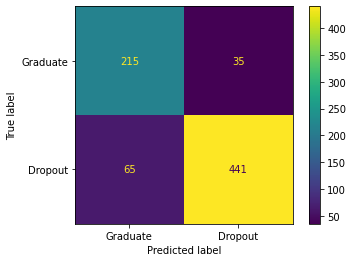

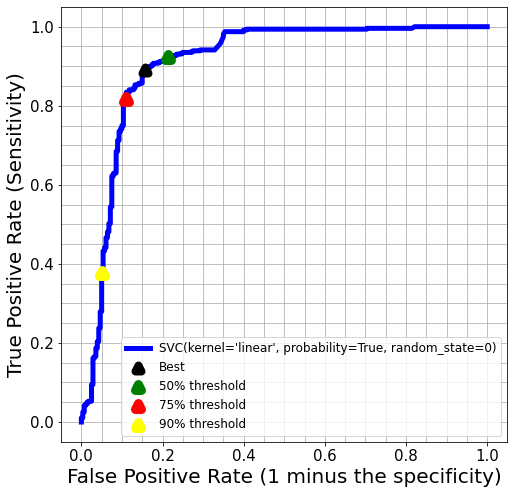

In [15]:
Supervised_ML(SVC(kernel='linear',random_state=0, probability=True))

## Summarize Machine Learning Models:

> I have implemented 5 different supervised ML techniques on binary classification (Graduate|Dropout) problem.

> RandomForest classifier has the highest Accuracy and ROC-AUC score of about 89% and 94% respectively.

> The best threshold depends on the objective of the model. In my case, Guassian Naive bayes gives the highest threshold percent (98.83). It shows that all the Graduated students classified as positive even if it supposed to classifying some Dropout students as Graduated.

## SHAP Analysis:

> SHAP is the most powerful Python package for understanding and debugging your models. It can tell us how each model feature (independent columns (X)) has contributed to an individual prediction (hat-Y). By aggregating SHAP values, we can also understand trends across multiple predictions. With a few lines of code, we are able to identify and visualise important relationships in our model.

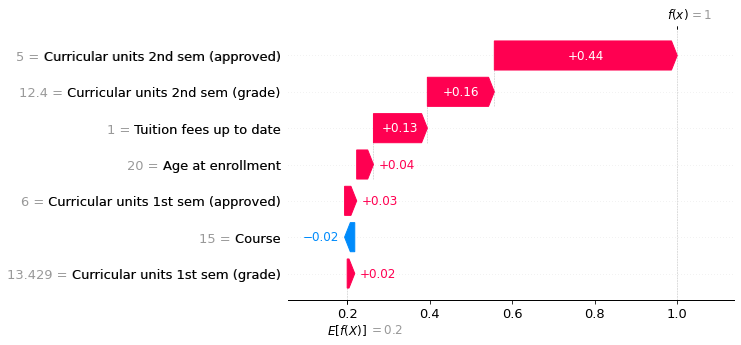

In [12]:
# Waterfall plot for first observation
shap.plots.waterfall(SHAP_values[0])

> E[f(x)] = 0.44 is the average predicted log odds across all the test dataset. For this specific data row, the model predicted a probability of f(x)=1 that it had a graduated student.

>  In each case, the SHAP values tell us how the features have contributed to the prediction when compared to the mean prediction. Large positive/negative values indicate that the feature had a significant impact on the model’s prediction.

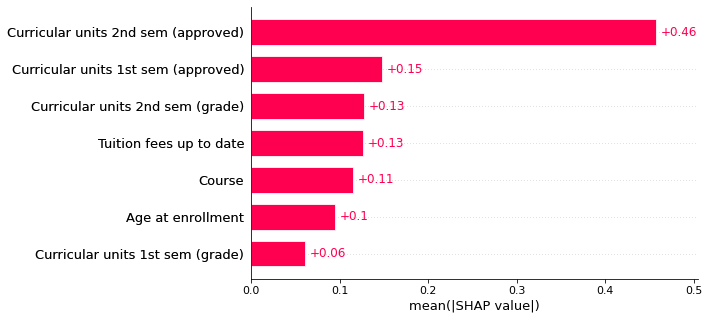

In [19]:
#Mean SHAP
shap.plots.bar(SHAP_values)

> Above Bar plot tell us which features are most important. For each feature, we calculate the mean SHAP value across all observations. Specifically, we take the mean of the absolute values as we do not want positive and negative values to offset each other. There is one bar for each feature e.g., we can see that "Curricular units 2nd semester approved" had the largest mean SHAP value.

>Features that have made large positive/negative contributions will have a large mean SHAP value. In other words, these are the features that have had a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot.

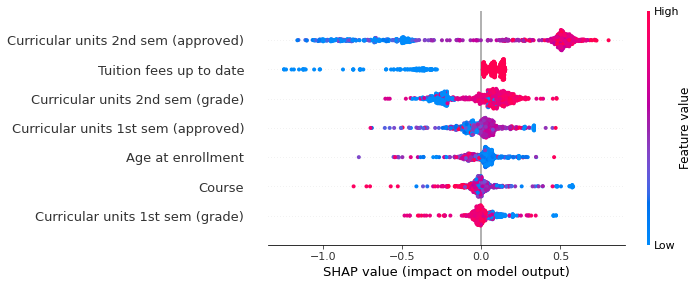

In [13]:
shap.plots.beeswarm(SHAP_values)

> Like mean SHAP, the beeswarm can be used to highlight important relationships. In fact, the features in the above plot are ordered by mean SHAP.

> We can also start to understand the nature of these relationships. For "Curricular units 2nd sem (approved)", notice how as the feature value increases the SHAP values increase. It tells us that larger values for "Curricular units 2nd sem (approved)" will lead to a higher predicted graduated students.

> You may have noticed that "Course" has the opposite relationship, this feature is associated with smaller SHAP values. 